In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Descripciones de algunos  Valores
`danceability :` Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

`acousticness :` A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

`duration_ms :` The duration of the track in milliseconds.

`energy :` Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

`instrumentalness :` Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

`key :` The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

`liveness :` Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

`loudness :` The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

`mode :` Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

`speechiness :` Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

`tempo :` The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

`time_signature :` An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

`valence :` A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


In [3]:
df = pd.read_csv("universal_top_spotify_songs.csv") 


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219553 entries, 0 to 1219552
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   spotify_id          1219553 non-null  object 
 1   name                1219526 non-null  object 
 2   artists             1219526 non-null  object 
 3   daily_rank          1219553 non-null  int64  
 4   daily_movement      1219553 non-null  int64  
 5   weekly_movement     1219553 non-null  int64  
 6   country             1202996 non-null  object 
 7   snapshot_date       1219553 non-null  object 
 8   popularity          1219553 non-null  int64  
 9   is_explicit         1219553 non-null  bool   
 10  duration_ms         1219553 non-null  int64  
 11  album_name          1218928 non-null  object 
 12  album_release_date  1219090 non-null  object 
 13  danceability        1219553 non-null  float64
 14  energy              1219553 non-null  float64
 15  key            

In [4]:
# aquí quería ver ytodos los países
valores_unicos = df['country'].unique()
print(valores_unicos)

[nan 'ZA' 'VN' 'VE' 'UY' 'US' 'UA' 'TW' 'TR' 'TH' 'SV' 'SK' 'SG' 'SE' 'SA'
 'RO' 'PY' 'PT' 'PL' 'PK' 'PH' 'PE' 'PA' 'NZ' 'NO' 'NL' 'NI' 'NG' 'MY'
 'MX' 'MA' 'LU' 'LT' 'KZ' 'KR' 'JP' 'IT' 'IS' 'IN' 'IL' 'IE' 'ID' 'HU'
 'HN' 'HK' 'GT' 'GR' 'GB' 'FR' 'FI' 'ES' 'EG' 'EE' 'EC' 'DO' 'DK' 'DE'
 'CZ' 'CR' 'CO' 'CL' 'CH' 'CA' 'BY' 'BR' 'BO' 'BG' 'BE' 'AU' 'AT' 'AR'
 'AE' 'LV']


Aquí elegí algunos países para ver como eran los datos, despúes podemos escoger más/menos países

In [4]:
# por ChatGpt JDWJW
paises_seleccionados = ['US', 'CL', 'MX', 'AR', 'CA',  # América
                        'FR', 'DE', 'IT', 'ES', 'SE',  # Europa
                        'JP', 'KR', 'IN', 'SG', 'VN',  # Asia
                        'ZA', 'EG', 'MA', 'NG', 'LV',  # África (con Letonia)
                        'AU', 'NZ']                   # Oceanía


In [9]:
# Filtrar el DataFrame
df_filtrado = df[df['country'].isin(paises_seleccionados)]

df_filtrado = df_filtrado.reset_index(drop=True)


In [10]:
df_filtrado = df.dropna(subset=['name'])
df_filtrado = df.dropna(subset=['artists'])

Aquí elegí 1500 canciónes más populares por país, podemos escojer más/menos : más adelante podemos hacer más filtrado, puede que algúnas canciones no sean realmente populares, tipo , popularidad 0 o menos de 50.

In [11]:


df_final = pd.DataFrame()

for pais in paises_seleccionados:
    #separa en distintos df, para luego filtrar los 100 más populares de cada país
    df_pais = df_filtrado[df_filtrado['country'] == pais]
    
   
    df_pais_ordenado = df_pais.sort_values(by='popularity', ascending=True)
   
    df_pais_top100 = df_pais_ordenado.head(1500)
    #volver a juntar
    
    df_final = pd.concat([df_final, df_pais_top100], ignore_index=True)

In [7]:
df_final.keys()

Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   spotify_id          33000 non-null  object 
 1   name                33000 non-null  object 
 2   artists             33000 non-null  object 
 3   daily_rank          33000 non-null  int64  
 4   daily_movement      33000 non-null  int64  
 5   weekly_movement     33000 non-null  int64  
 6   country             33000 non-null  object 
 7   snapshot_date       33000 non-null  object 
 8   popularity          33000 non-null  int64  
 9   is_explicit         33000 non-null  bool   
 10  duration_ms         33000 non-null  int64  
 11  album_name          32957 non-null  object 
 12  album_release_date  32996 non-null  object 
 13  danceability        33000 non-null  float64
 14  energy              33000 non-null  float64
 15  key                 33000 non-null  int64  
 16  loud

Aquí hice algunos gráficos con ChatGpt, para ver cositas agrupadas por país, igual en kaggle hay buenos gráficos. 

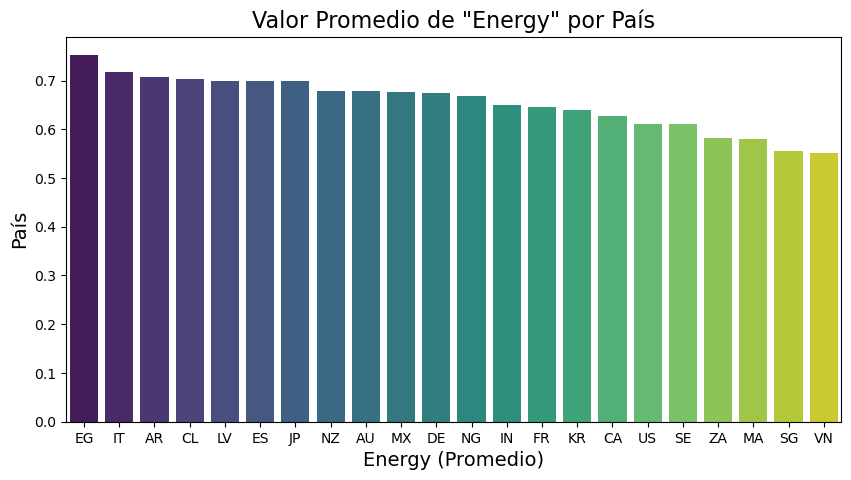

In [12]:
# Agrupar el DataFrame por país y calcular el valor promedio de 'energy'
df_energy_avg = df_final.groupby('country')['energy'].mean().reset_index()

# Ordenar los países por el valor promedio de 'energy'
df_energy_avg = df_energy_avg.sort_values(by='energy', ascending=False)

# Crear un gráfico de barras horizontal usando Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(y='energy', x='country', data=df_energy_avg, palette='viridis')

# Añadir título y etiquetas
plt.title('Valor Promedio de "Energy" por País', fontsize=16)
plt.xlabel('Energy (Promedio)', fontsize=14)
plt.ylabel('País', fontsize=14)

# Mostrar el gráfico
plt.show()

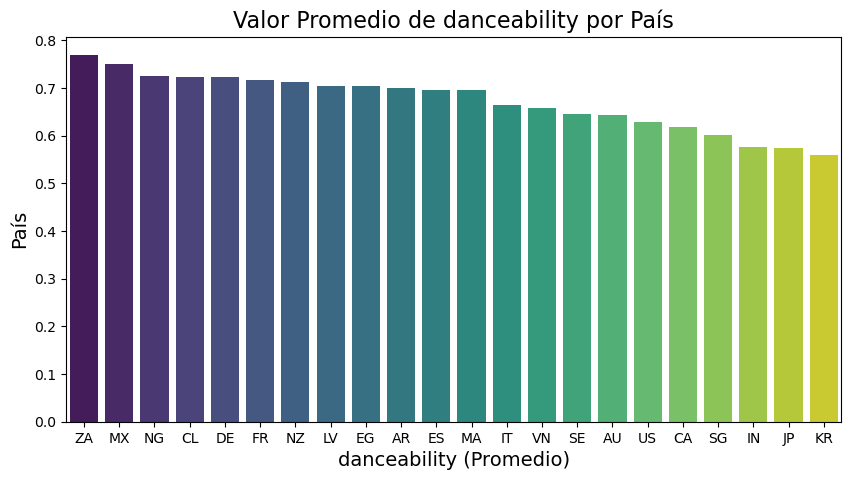

In [13]:
# Agrupar el DataFrame por país y calcular el valor promedio de 'energy'
df_energy_avg = df_final.groupby('country')['danceability'].mean().reset_index()

# Ordenar los países por el valor promedio de 'energy'
df_energy_avg = df_energy_avg.sort_values(by='danceability', ascending=False)

# Crear un gráfico de barras usando Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(y= "danceability", x='country', data=df_energy_avg, palette='viridis')

# Añadir título y etiquetas
plt.title('Valor Promedio de danceability por País', fontsize=16)
plt.xlabel('danceability (Promedio)', fontsize=14)
plt.ylabel('País', fontsize=14)

# Mostrar el gráfico
plt.show()

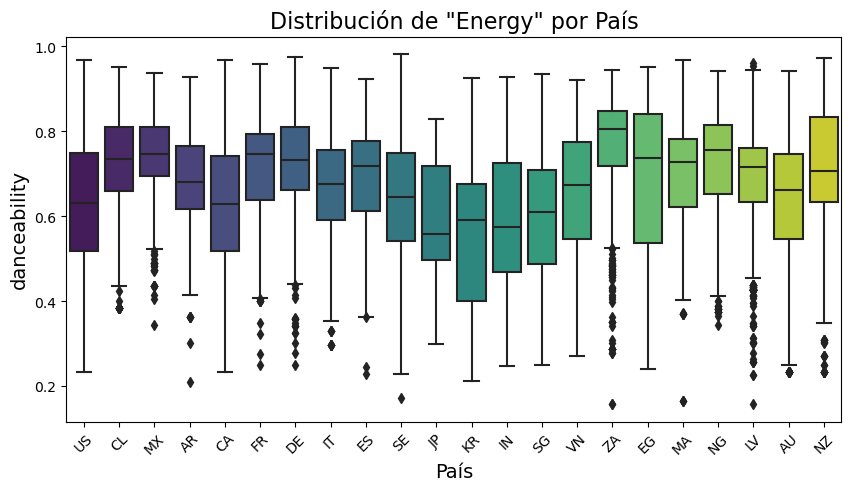

In [13]:
# Crear un boxplot para visualizar la distribución de 'energy' por país
plt.figure(figsize=(10, 5))
sns.boxplot(x='country', y='danceability', data=df_final, palette='viridis')

# Añadir título y etiquetas
plt.title('Distribución de "Energy" por País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('danceability', fontsize=14)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


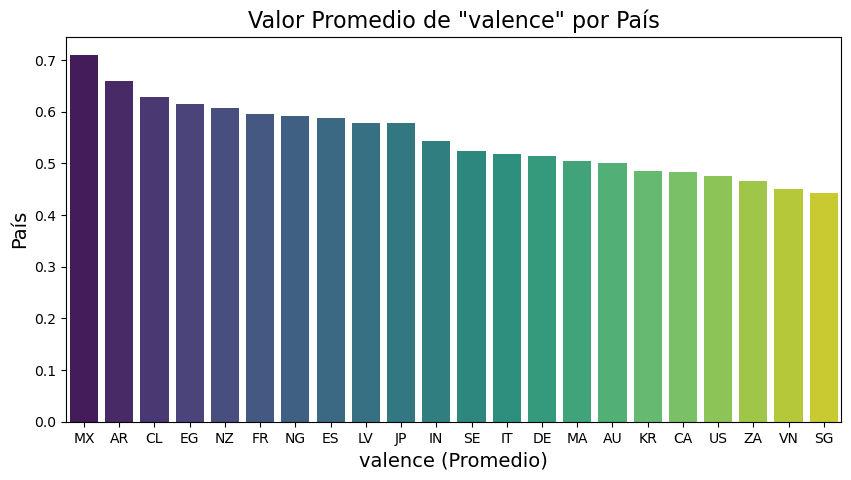

In [14]:
# Agrupar el DataFrame por país y calcular el valor promedio de 'energy'
df_energy_avg = df_final.groupby('country')['valence'].mean().reset_index()

# Ordenar los países por el valor promedio de 'energy'
df_energy_avg = df_energy_avg.sort_values(by='valence', ascending=False)

# Crear un gráfico de barras usando Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(y= "valence", x='country', data=df_energy_avg, palette='viridis')

# Añadir título y etiquetas
plt.title('Valor Promedio de "valence" por País', fontsize=16)
plt.xlabel('valence (Promedio)', fontsize=14)
plt.ylabel('País', fontsize=14)


plt.show()

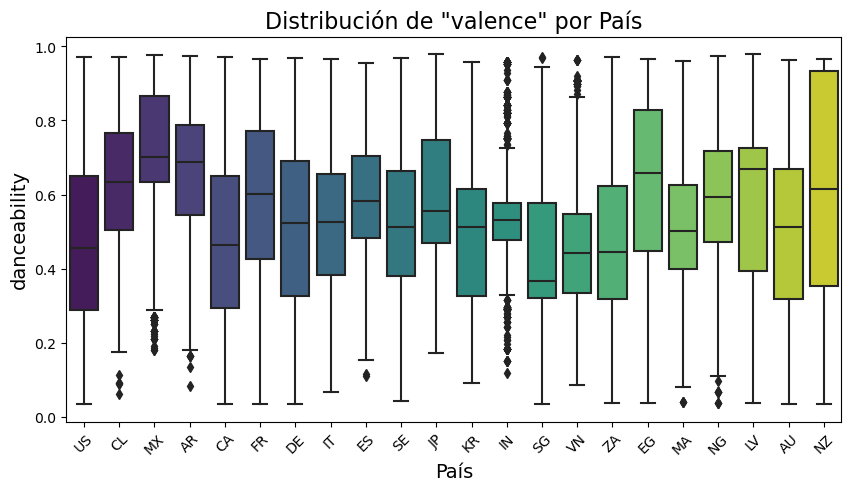

In [20]:
# Crear un boxplot para visualizar la distribución de 'energy' por país
plt.figure(figsize=(10, 5))
sns.boxplot(x='country', y='valence', data=df_final, palette='viridis')

# Añadir título y etiquetas
plt.title('Distribución de "valence" por País', fontsize=16)
plt.xlabel('País', fontsize=14)
plt.ylabel('danceability', fontsize=14)

# Rotar etiquetas del eje x si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()